## Prédiction des Prix des Logements avec Régression Linéaire

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
%matplotlib inline 
import statsmodels.formula.api as smf
sns.set()

In [55]:
df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [56]:
dd = df.describe()
dd

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [57]:
# je verifie le nombre des colunms et des lignes
df.shape

(1460, 81)

In [58]:
# je voie que le dataframe contient de nombreuse valeur NaN
# train.info()

In [59]:
# df.isnull().sum()
# 6965

In [60]:
# je remplace les valeurs Nan
for name in df.columns:
    x = df[name].isna().sum()
    if x > 0:
        val_list = np.random.choice(df.groupby(name).count().index, x, p=df.groupby(name).count()['Id'].values /sum(df.groupby(name).count()['Id'].values))
        df.loc[df[name].isna(), name] = val_list

In [61]:
sum(df.isna().sum())

0

In [62]:
#df.describe()

In [63]:
#df['MasVnrArea'] = df['MasVnrArea'].replace(0.0,df['MasVnrArea'].mean())

In [64]:
df2 = df[['SalePrice', 'OverallQual', 'YearRemodAdd', 'MasVnrArea']]

In [65]:
df2.head()

,SalePrice,OverallQual,YearRemodAdd,MasVnrArea
0,208500,7,2003,196.0
1,181500,6,1976,0.0
2,223500,7,2002,162.0
3,140000,7,1970,0.0
4,250000,8,2000,350.0


## Linear Regression Univariate 

Y = b0 + b1X

<AxesSubplot:>

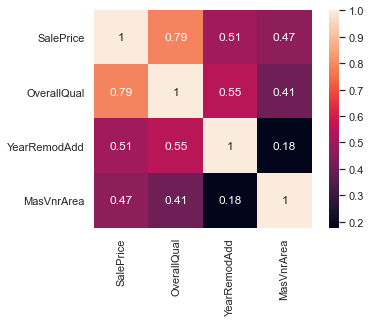

In [66]:
corr_matrix = df2.corr()
sns.heatmap(corr_matrix, square=True, annot=True)

[Text(0.5, 1.0, 'Prix de vente et qualite de la propriété')]

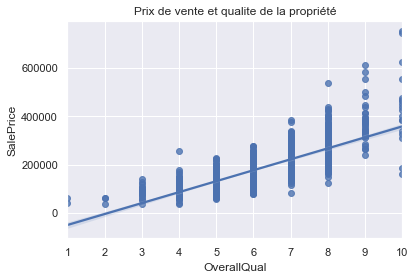

In [67]:
sns.regplot(data=df2, x='OverallQual', y='SalePrice').set(title='Prix de vente et qualite de la propriété')


### Problématique
#### On souhaiterait prédire le SalePrice en fonction de la OverallQual.

In [68]:
model = smf.ols(formula='SalePrice ~ OverallQual', data=df).fit()

In [69]:
# pour trouver la valeur de intercept (b0) et coef (b1)
# Y = b0 + b1X

b0 = model.params[0]
b1 = model.params[1]
print(b0)
print(b1)

-96206.0795147603
45435.80259309938


In [70]:
df2['response'] = model.predict(df2)
df2.head()

<ipython-input-70-3617a900b134>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['response'] = model.predict(df2)


,SalePrice,OverallQual,YearRemodAdd,MasVnrArea,response
0,208500,7,2003,196.0,221844.538637
1,181500,6,1976,0.0,176408.736044
2,223500,7,2002,162.0,221844.538637
3,140000,7,1970,0.0,221844.538637
4,250000,8,2000,350.0,267280.341230


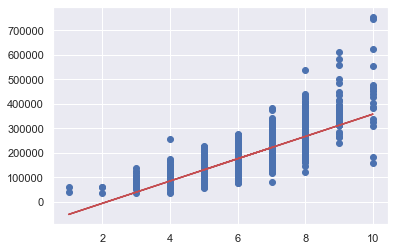

In [71]:
plt.scatter(df2['OverallQual'],df['SalePrice'])
plt.plot(df2['OverallQual'],df2['response'], color='r')
#plt.show()

In [72]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     2437.
Date:                Fri, 21 May 2021   Prob (F-statistic):          2.19e-313
Time:                        15:31:17   Log-Likelihood:                -17827.
No. Observations:                1460   AIC:                         3.566e+04
Df Residuals:                    1458   BIC:                         3.567e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -9.621e+04   5756.407    -16.713      0.000   -1.07e+05   -8.49e+04
OverallQual  4.544e+04    920.430     49.364      0.000    4.36e+04    4.72e+04
==============================================================================
Omnibus:                      591.594   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5872.098
Skew:                           1.607   Prob(JB):                         0.00
Kurtosis:                      12.284   Cond. No.                         29.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### R-squared = 0.626
* 62.6 % de la variation de la variable Y (SalePrice) est expliquée par la variable X (OverallQual).
* notre modèle est capable de déterminer la distribution à 62.6 %

#### coef = 4.544e+04
* Le signe d'un coefficient de régression vous indique s'il existe une corrélation positive ou négative entre chaque variable indépendante et la variable dépendante.

In [73]:
result = model.params['OverallQual']*7 + model.params['Intercept']
result

221844.5386369354

### Prediction avec Sklearn (univariate)

In [74]:
reg = linear_model.LinearRegression()
reg.fit(df2[['OverallQual']],df.SalePrice)

LinearRegression()

In [75]:
reg.coef_

array([45435.8025931])

In [76]:
reg.intercept_

-96206.07951476038

#### Predicte the price of a home with 8 OverallQualification

In [77]:
reg.predict([[8]])

array([267280.34123003])

## Linear Regression Multivariate 

y = m1x1 + m2x2 + m3x3 + b

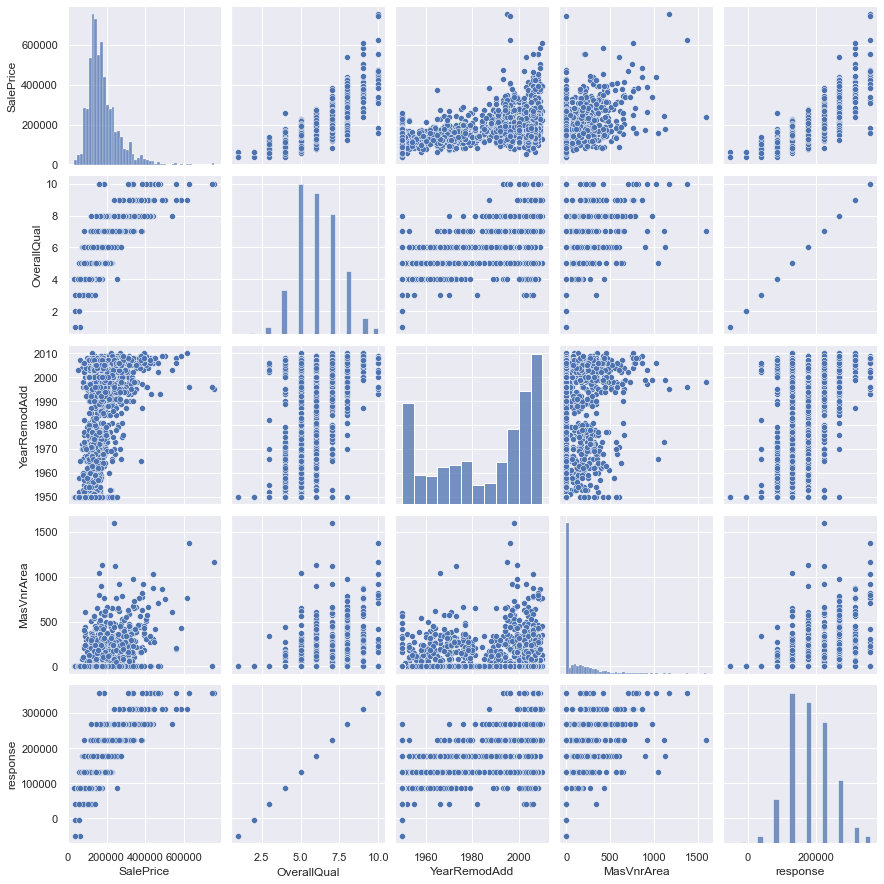

In [78]:
sns.pairplot(df2)

In [79]:
model2 = smf.ols(formula='SalePrice ~ OverallQual + MasVnrArea + YearRemodAdd', data=df).fit()

In [80]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     950.3
Date:                Fri, 21 May 2021   Prob (F-statistic):               0.00
Time:                        15:31:20   Log-Likelihood:                -17752.
No. Observations:                1460   AIC:                         3.551e+04
Df Residuals:                    1456   BIC:                         3.553e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -9.362e+05   1.36e+05     -6.874      0.000    -1.2e+06   -6.69e+05
OverallQual   3.742e+04   1132.362     33.042      0.000    3.52e+04    3.96e+04
MasVnrArea      82.0628      7.349     11.167      0.000      67.647      96.479
YearRemodAdd   443.5487     70.378      6.302      0.000     305.496     581.602
==============================================================================
Omnibus:                      577.937   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6639.402
Skew:                           1.513   Prob(JB):                         0.00
Kurtosis:                      12.999   Cond. No.                     2.24e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
result = model2.params['OverallQual']*7 + model2.params['MasVnrArea']*196 + model2.params['YearRemodAdd']*2003 + model2.params['Intercept']
result

230273.53047661018

### Prediction avec Sklearn 

In [82]:
from sklearn.linear_model import LinearRegression
X = df2[['OverallQual','YearRemodAdd','MasVnrArea']]
y = df2.SalePrice
reg = LinearRegression().fit(X,y)
reg.score(X,y)

0.6619443045686597

In [83]:
reg.coef_

array([37415.91376945,   443.54871802,    82.0627897 ])

In [84]:
reg.intercept_

-936150.2548879395

#### Predicte the price of a home with 6 OverallQualification, Remodeled year 1976 with 103 sqr metre

In [85]:
reg.predict([[6, 1976, 103]])

array([173249.96187805])